# Taller Preprocesamiento

Juan Navarro, <jsnavarroa@unal.edu.co>

## 3. El número de hijos de diferentes pacientes es dado por el siguiente vector:

C = {3, 1, 0, 2, 7, 3, 6, 4, −2, 0, 0, 10, 15, 6}

a) Encontrar “outliers” usando parámetros estadisticos estándar: media y varianza

b) Si el umbral cambia de ±3 desviaciones estandar a ±2 desviaciones estandar , ¿Cuál “outlier adicional” se encuentra?

[1] 3.928571

[1] 20.99451

[1] 4.581976

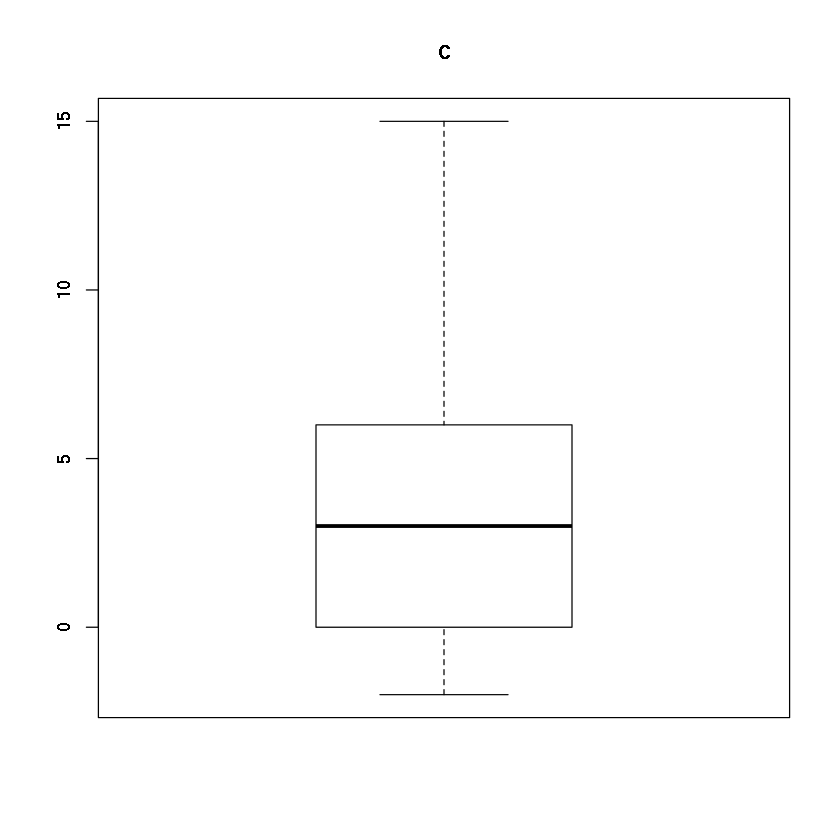

In [16]:
c <- c(3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6)
mean(c)
var(c)
sd(c)

boxplot(c, main="c", outline=TRUE)

## 4. Dado un conjunto de tres dimensiones, 

X=[{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}]

    a) Describir el procedimiento e interpretar los resultados de detección de outliers basado en la media y varianza.

a,1,2,0
b,3,1,4
c,2,1,5
d,0,1,6
e,2,4,3
f,4,4,2
g,5,2,1
h,7,7,7
i,0,0,0
j,3,3,3


,a,b,c,d,e,f,g,h,i,j
a,0.000000,4.582576,5.196152,6.164414,3.741657,4.123106,4.123106,10.488088,2.236068,3.741657
b,4.582576,0.000000,1.414214,3.605551,3.316625,3.741657,3.741657,7.810250,5.099020,2.236068
c,5.196152,1.414214,0.000000,2.236068,3.605551,4.690416,5.099020,8.062258,5.477226,3.000000
d,6.164414,3.605551,2.236068,0.000000,4.690416,6.403124,7.141428,9.273618,6.082763,4.690416
e,3.741657,3.316625,3.605551,4.690416,0.000000,2.236068,4.123106,7.071068,5.385165,1.414214
f,4.123106,3.741657,4.690416,6.403124,2.236068,0.000000,2.449490,6.557439,6.000000,1.732051
g,4.123106,3.741657,5.099020,7.141428,4.123106,2.449490,0.000000,8.062258,5.477226,3.000000
h,10.488088,7.810250,8.062258,9.273618,7.071068,6.557439,8.062258,0.000000,12.124356,6.928203
i,2.236068,5.099020,5.477226,6.082763,5.385165,6.000000,5.477226,12.124356,0.000000,5.196152
j,3.741657,2.236068,3.000000,4.690416,1.414214,1.732051,3.000000,6.928203,5.196152,0.000000


,a,b,c,d,e,f,g,h,i,j
Mean,4.440,3.555,3.878,5.029,3.558,3.793,4.322,7.638,5.308,3.194
SD,2.706,2.125,2.324,2.627,2.010,2.189,2.315,3.191,3.078,2.027
low,-3.678,-2.820,-3.094,-2.852,-2.473,-2.772,-2.623,-1.935,-3.927,-2.888
Min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
high,12.557,9.929,10.850,12.910,9.590,10.359,11.266,17.211,14.542,9.276
Max,10.488,7.810,8.062,9.274,7.071,6.557,8.062,12.124,12.124,6.928
Count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000


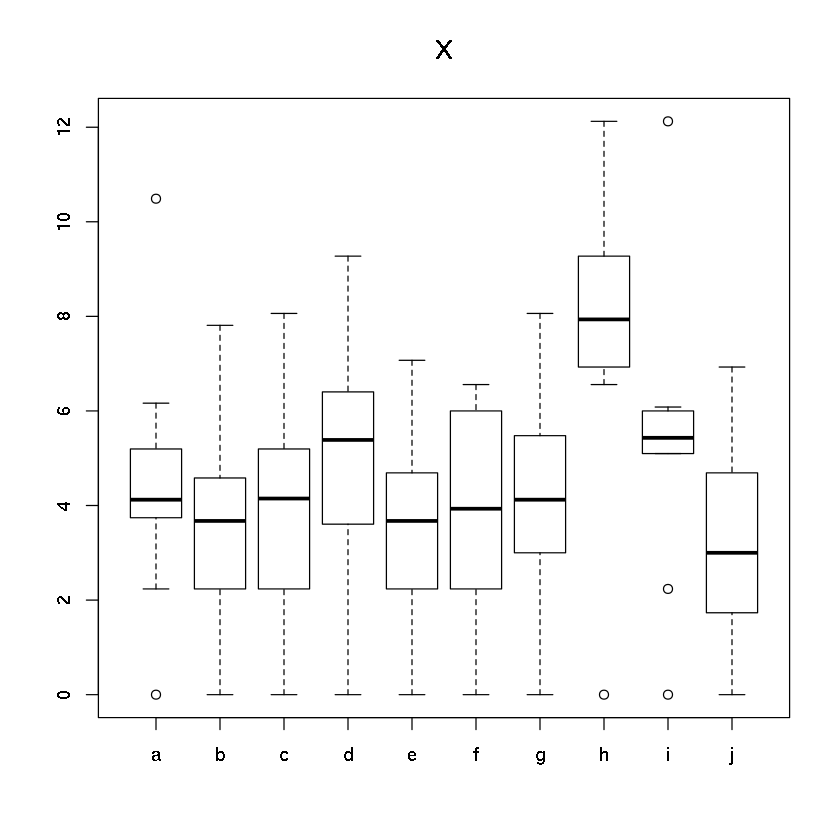

In [26]:
X = matrix( c(1,2,0,3,1,4,2,1,5,0,1,6,2,4,3,4,4,2,5,2,1,7,7,7,0,0,0,3,3,3), ncol=3, byrow=TRUE)
rownames(X) <- letters[1:10]
X

euclidean <- data.matrix(dist(X, method = "euclidean", upper=FALSE))

#euclidean[lower.tri(euclidean)] <- NA

euclidean

# Defining the function, remove NA values by default
my.summary <- function(x, na.rm=TRUE){
  result <- c(Mean = mean(x, na.rm=na.rm),
              SD = sd(x, na.rm=na.rm),
              low = mean(x, na.rm=na.rm) + sd(x, na.rm=na.rm)*-3,
              Min = min(x, na.rm=na.rm),
              high = mean(x, na.rm=na.rm) + sd(x, na.rm=na.rm)*3,
              Max = max(x, na.rm=na.rm),
              Count = length(x))
    
    
    
    result <- round(result, digits=3)
}


# Applying the function
apply(euclidean, 2, my.summary)


# Box plots
boxplot(euclidean, main="X", outline=TRUE, use.cols = TRUE)

## 9. Escoger un conjunto de datos del repositorio de Machine learning, que tenga varias dimensiones y que sean numéricas, y aplicar PCA. Describir el nuevo conjunto de datos.

In [8]:
wine <- read.csv("./data/UCI/wine.data", header=FALSE)

names(wine) <- c("class identifier", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                 "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", 
                 "Hue", "OD280/OD315 of diluted wines", "Proline")

# Reorder columns by name
col_order <- c("Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                 "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", 
                 "Hue", "OD280/OD315 of diluted wines", "Proline", "class identifier")
wine <- wine[, col_order]

head(wine)

write.csv(wine, file = "./data/UCI/wine.csv", row.names=FALSE)

Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class identifier
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
